In [1]:
from nltk.corpus import wordnet, words
import nltk
import re
import json
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## See how sentiment of a text evolves throughout the text. Create an attractor by looking at the different time series (neg, neu, pos) as one windows throughout the text. 

need to look into alternative for SentimentIntensityAnalyzer because it's kinda bad

In [2]:
with open('/Users/brianbarry/nltk_data/odyssey_original.txt','r') as f:
    start_, stop_ = 'Book I', 'FOOTNOTES' #'End of the Project'
    text = f.read()
    text = re.sub("\n|\r", " ", text[text.index(start_):text.index(stop_)])
    text_sents = nltk.sent_tokenize(text)
    text_words = nltk.word_tokenize(text)

In [4]:
len(text_words)

134719

In [28]:
SIA = SentimentIntensityAnalyzer()
time_series = {'neg':[],'pos':[],'neu':[],'compound':[]}
for sent in text_sents:
    score = SIA.polarity_scores(sent)
    [time_series[key].append(score[key]) for key in score.keys()]
    

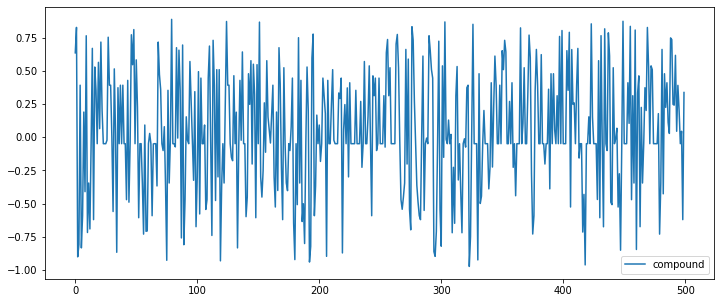

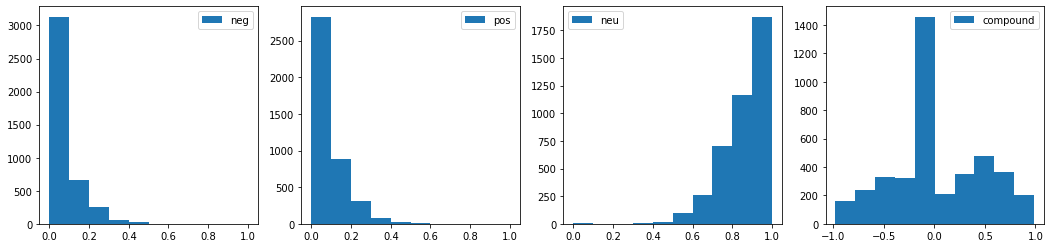

In [91]:
plt.figure(figsize=(12,5))
x_ = range(len(time_series['pos']))
cutoff = 500
for i in time_series.keys():
    if i not in ('pos', 'neg','pos','neu'):
        series = np.array(time_series[i])-np.mean(time_series[i])
        plt.plot(x_[:cutoff], series[:cutoff], label = i)
        plt.legend()
plt.figure(figsize=(18,4))
for n, i in enumerate(time_series.keys()):
    plt.subplot(1,4,n+1)
    plt.hist(time_series[i], label = i)
    plt.legend()    

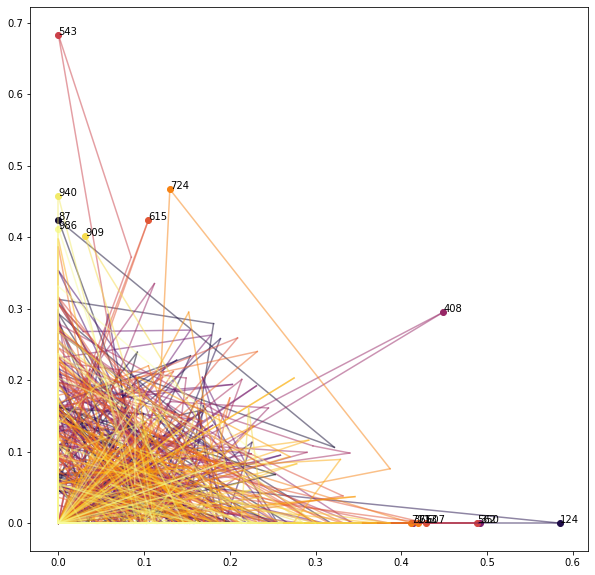

In [100]:
def draw_phase_space(x,y):
    xprev,yprev = x[0],y[0]
    plt.figure(figsize=(10,10))
    colors = list(iter(plt.cm.inferno(np.linspace(0, 1, len(x)))))
    i_c=0
    for xn,yn in list(zip(x,y))[1:]:
        plt.plot([xprev,xn],[yprev,yn],color=colors[i_c],alpha=0.5); i_c+=1
        if xn >=0.4 or yn >= 0.4:
            plt.scatter([xn],[yn],label=i_c,color=colors[i_c])
            plt.annotate(i_c,(xn,yn))
        xprev,yprev=xn,yn
    #plt.legend()
cutoff=1000
draw_phase_space(time_series['pos'][:cutoff],time_series['neg'][:cutoff])

In [106]:
ind=724
[f'{text_sents[i]}, SCORES: {SIA.polarity_scores(text_sents[i])}' for i in [ind-1,ind,ind+1]]

["Seeing in what greatdistress Ulysses now was, she had compassion upon him, and, rising likea sea-gull from the waves, took her seat upon the raft., SCORES: {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.4588}",
 '"My poor good man," said she, "why is Neptune so furiously angry withyou?, SCORES: {\'neg\': 0.467, \'neu\': 0.403, \'pos\': 0.13, \'compound\': -0.8186}',
 "He is giving you a great deal of trouble, but for all his blusterhe will not kill you., SCORES: {'neg': 0.076, 'neu': 0.537, 'pos': 0.387, 'compound': 0.818}"]

In [ ]:
def delay_embed(data, norm, m, step = 1):
    """m is window length"""
    data = np.array(data)
    nt = data.shape[0] #length of original vector
    n = int((nt-m+1)/step) #number of lags
    traj_mat = np.empty((0,m)) #initialize delay embedded trajectory matrix
    for i in range(n):
        window_i = data[i*step:i*step + m]
        traj_mat = np.append(traj_mat, [window_i], axis=0 )
    
    if norm:
        traj_mat = (1/(nt**0.5)) * traj_mat #normalize by 1/sqrt(n)
    return traj_mat



In [ ]:
SIA = SentimentIntensityAnalyzer()
SIA.polarity_scores("apple")